# RNA-seq Differential Expression Analysis (Without small RNA analysis)
## Centriolar mRNA Localization Project

**Experimental Design:**
- 3 cell lines: HeLa, RPE-p53KO, KE37-WT (2 replicates each)
- 1 control: RPE-SAS6KO (no centrioles)
- Goal: Identify mRNAs enriched at isolated centrioles

In [ ]:
- Assumption
in SAS6KO, the RNA are mainly from cytoplasm and other organelles
In the 6 other groups, RNAs are mainly from centrioles, cytoplasm, other organelles and some maybe cell line specific genes's expression

In [ ]:

    Centriole_RNA = intersection( RPEp53_RNA.Average - RPESAS6_RNA, HeLa_RNA.Average - RPESAS6_RNA,
                                 KE37_RNA.Average - KE37SAS6_RNA)
                  = union( RPEp53_RNA.Average - RPESAS6_RNA, HeLa_RNA.Average - RPESAS6_RNA,
                                 KE37_RNA.Average - KE37SAS6_RNA) - cellline_specific_genes_RNA

    cellline_specific_genes = union( HeLa_RNA.Average, KE37_RNA.Average)

## 1. Load Packages

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
counts_df = pd.read_csv('/home/jiguo/data/data/outdir_rnaseq/counts/counts.txt', 
                        sep='\t', comment='#', skiprows=1)
counts_df

,Geneid,Chr,Start,End,Strand,Length,control.Aligned.sortedByCoord.out.bam,rep3_1.Aligned.sortedByCoord.out.bam,rep2_1.Aligned.sortedByCoord.out.bam,rep1_1.Aligned.sortedByCoord.out.bam,rep1_0.Aligned.sortedByCoord.out.bam,rep3_0.Aligned.sortedByCoord.out.bam,rep2_0.Aligned.sortedByCoord.out.bam
0,ENSG00000290825.2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,11121;11125;11410;11411;11426;11770;11819;1182...,11211;11211;11671;11671;11671;11844;11844;1184...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,2898,2,0,0,0,0,10,0
1,ENSG00000223972.6,chr1;chr1;chr1;chr1;chr1;chr1,12010;12179;12613;12975;13221;13453,12057;12227;12697;13052;13374;13670,+;+;+;+;+;+,632,0,0,0,0,0,0,0
2,ENSG00000310526.1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14356;14356;14356;14356;14356;14356;14356;1436...,14829;14829;14829;14829;14829;14829;14829;1482...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,6775,33,287,14,64,79,927,29
3,ENSG00000227232.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,14696;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-,1380,0,0,0,0,0,0,0
4,ENSG00000278267.1,chr1,17369,17436,-,68,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78927,ENSG00000303867.1,KI270751.1;KI270751.1;KI270751.1;KI270751.1;KI...,2579;3475;3479;3479;3482;4368;4368;4368;4368;7...,3883;3883;3883;4490;3883;4490;4490;4490;4490;7...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,10647,0,0,0,0,0,0,0
78928,ENSG00000303902.1,KI270751.1;KI270751.1;KI270751.1;KI270751.1;KI...,34096;34251;42980;44851;44857;44879;44899;4491...,34151;34326;43109;45034;45034;45034;45034;4503...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,3770,0,0,0,0,0,0,0
78929,ENSG00000306528.1,KI270751.1;KI270751.1;KI270751.1;KI270751.1;KI...,133801;133807;135162;135199;139047,134122;134122;135236;135236;139253,-;-;-;-;-,604,0,1,0,20,38,0,0
78930,ENSG00000297844.1,KI270753.1;KI270753.1,43135;44107,43518;44491,+;+,769,0,1,0,2,2,0,0


## 2. Create Sample Metadata

In [29]:
# set gene_id as index
counts_df = counts_df.set_index('Geneid')

In [30]:
counts_df

,Chr,Start,End,Strand,Length,control.Aligned.sortedByCoord.out.bam,rep3_1.Aligned.sortedByCoord.out.bam,rep2_1.Aligned.sortedByCoord.out.bam,rep1_1.Aligned.sortedByCoord.out.bam,rep1_0.Aligned.sortedByCoord.out.bam,rep3_0.Aligned.sortedByCoord.out.bam,rep2_0.Aligned.sortedByCoord.out.bam
Geneid,,,,,,,,,,,,
ENSG00000290825.2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,11121;11125;11410;11411;11426;11770;11819;1182...,11211;11211;11671;11671;11671;11844;11844;1184...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,2898,2,0,0,0,0,10,0
ENSG00000223972.6,chr1;chr1;chr1;chr1;chr1;chr1,12010;12179;12613;12975;13221;13453,12057;12227;12697;13052;13374;13670,+;+;+;+;+;+,632,0,0,0,0,0,0,0
ENSG00000310526.1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14356;14356;14356;14356;14356;14356;14356;1436...,14829;14829;14829;14829;14829;14829;14829;1482...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,6775,33,287,14,64,79,927,29
ENSG00000227232.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,14696;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-,1380,0,0,0,0,0,0,0
ENSG00000278267.1,chr1,17369,17436,-,68,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000303867.1,KI270751.1;KI270751.1;KI270751.1;KI270751.1;KI...,2579;3475;3479;3479;3482;4368;4368;4368;4368;7...,3883;3883;3883;4490;3883;4490;4490;4490;4490;7...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,10647,0,0,0,0,0,0,0
ENSG00000303902.1,KI270751.1;KI270751.1;KI270751.1;KI270751.1;KI...,34096;34251;42980;44851;44857;44879;44899;4491...,34151;34326;43109;45034;45034;45034;45034;4503...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,3770,0,0,0,0,0,0,0
ENSG00000306528.1,KI270751.1;KI270751.1;KI270751.1;KI270751.1;KI...,133801;133807;135162;135199;139047,134122;134122;135236;135236;139253,-;-;-;-;-,604,0,1,0,20,38,0,0


In [31]:
# remove annotation columns 
counts_cols = [col for col in counts_df.columns if 'Aligned' in col]
counts = counts_df[counts_cols]
counts

,control.Aligned.sortedByCoord.out.bam,rep3_1.Aligned.sortedByCoord.out.bam,rep2_1.Aligned.sortedByCoord.out.bam,rep1_1.Aligned.sortedByCoord.out.bam,rep1_0.Aligned.sortedByCoord.out.bam,rep3_0.Aligned.sortedByCoord.out.bam,rep2_0.Aligned.sortedByCoord.out.bam
Geneid,,,,,,,
ENSG00000290825.2,2,0,0,0,0,10,0
ENSG00000223972.6,0,0,0,0,0,0,0
ENSG00000310526.1,33,287,14,64,79,927,29
ENSG00000227232.6,0,0,0,0,0,0,0
ENSG00000278267.1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
ENSG00000303867.1,0,0,0,0,0,0,0
ENSG00000303902.1,0,0,0,0,0,0,0
ENSG00000306528.1,0,1,0,20,38,0,0


In [32]:
# clean column names
counts.columns = counts.columns.str.replace('.Aligned.sortedByCoord.out.bam', '')

In [33]:
# create sample metadata
sample_info = pd.DataFrame({
    'sample_id' : ['rep1_0', 'rep1_1', 'rep2_0', 'rep2_1', 'rep3_0', 'rep3_1','control'],
    'cell_line' : ['HeLa', 'HeLa', 'RPE-p53KO', 'RPE-p53KO', 'KE37-WT', 'KE37-WT','RPE-SAS6KO'],
    'condition' : ['with_centrioles'] * 6 + ['without_centrioles'],
    'replicate' : [1, 2] * 3 + [1]
}).set_index('sample_id')

In [34]:
sample_info

,cell_line,condition,replicate
sample_id,,,
rep1_0,HeLa,with_centrioles,1
rep1_1,HeLa,with_centrioles,2
rep2_0,RPE-p53KO,with_centrioles,1
rep2_1,RPE-p53KO,with_centrioles,2
rep3_0,KE37-WT,with_centrioles,1
rep3_1,KE37-WT,with_centrioles,2
control,RPE-SAS6KO,without_centrioles,1


## 3. Filter Low-Count Genes

In [ ]:
# keep genes with at least 10 counts in at least 1 samples
keep = (counts>=5).sum(axis=1) >= 1
counts_filtered = counts[keep]
print(f'filtered from {counts.shape[0]} to {counts_filtered.shape[0]} genes')

filtered from 78932 to 78932 genes


In [36]:
# normalize counts using (CPM - counts per million)
# calculate library sizes
library_sizes = counts_filtered.sum(axis=0)

In [37]:
cpm = counts_filtered.div(library_sizes, axis=1) * 1e6 # axis =1 for meaning column-wise division
log_cpm=np.log2(cpm + 1)  # log2 transform with pseudocount of 1
print("library sizes:\n", library_sizes)

library sizes:
 control    141404928
rep3_1     117089491
rep2_1     139336470
rep1_1     163383482
rep1_0     117562320
rep3_0      68407431
rep2_0     157378275
dtype: int64


## 4. PCA analysis

In [38]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_cpm.T)  # transpose to have samples as rows

In [39]:
# Create PCA fataframe
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2'], 
    index=counts_filtered.columns)


In [40]:
pca_df = pca_df.join(sample_info)

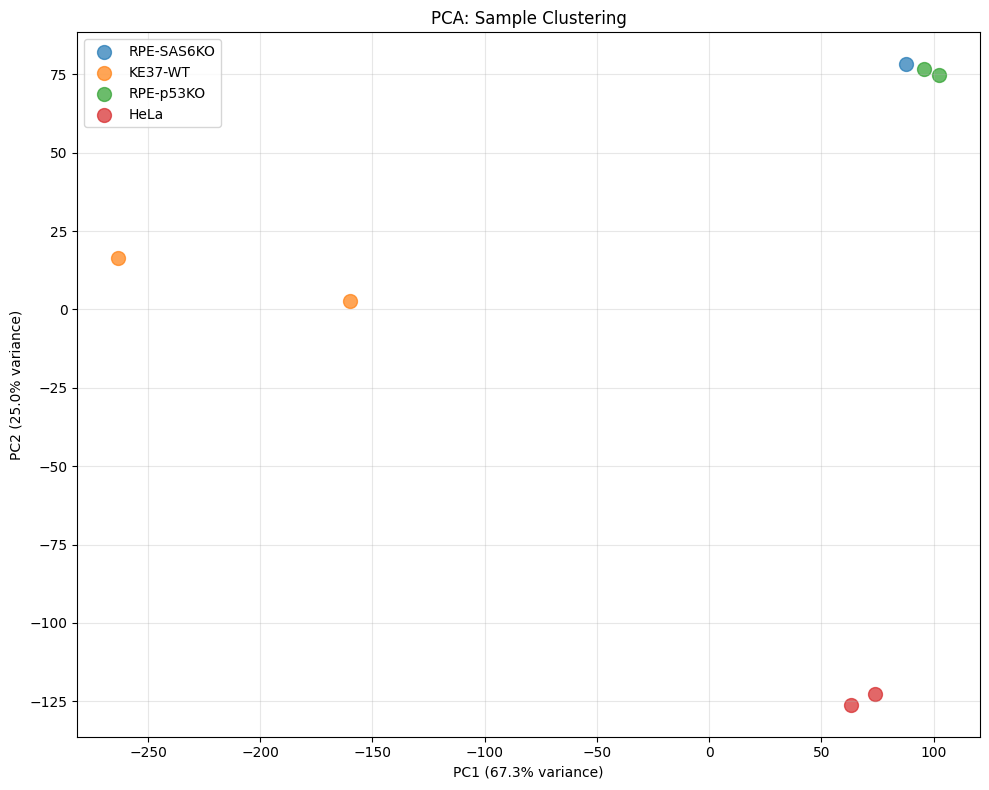

In [41]:
# Plot PCA
plt.figure(figsize=(10, 8))
for cellline in pca_df['cell_line'].unique():
    mask = pca_df['cell_line'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC1'], 
                pca_df.loc[mask, 'PC2'],
                label=cellline, s=100, alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA: Sample Clustering')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. other analysis

#### - The difference between RPE-p53(-) and RPE-SAS6(-)

In [42]:
centriole_samples = sample_info[(sample_info['condition']=='with_centrioles') & (sample_info['cell_line']=='RPE-p53KO')].index
control_samples = sample_info[sample_info['condition']=='without_centrioles'].index
# use CPM values
centriole_counts = log_cpm[centriole_samples]
control_counts = log_cpm[control_samples]

# calculate mean expression and fold change
mean_centrioles = centriole_counts.mean(axis=1)
control_expr = control_counts.mean(axis=1)
fold_change = mean_centrioles - control_expr
mean_expr = (mean_centrioles + control_expr) / 2

In [43]:
from scipy.stats import gaussian_kde
# calculate the point density
xy = np.vstack([mean_expr, fold_change])
z = gaussian_kde(xy)(xy)

In [44]:
# save the list of significant genes
significant_genes = fold_change[fold_change.abs() >= 1]
significant_genes.to_csv('significant_genes_RPE-p53KO_vs_Control.txt', sep='\t', header=['Log2_Fold_Change'])

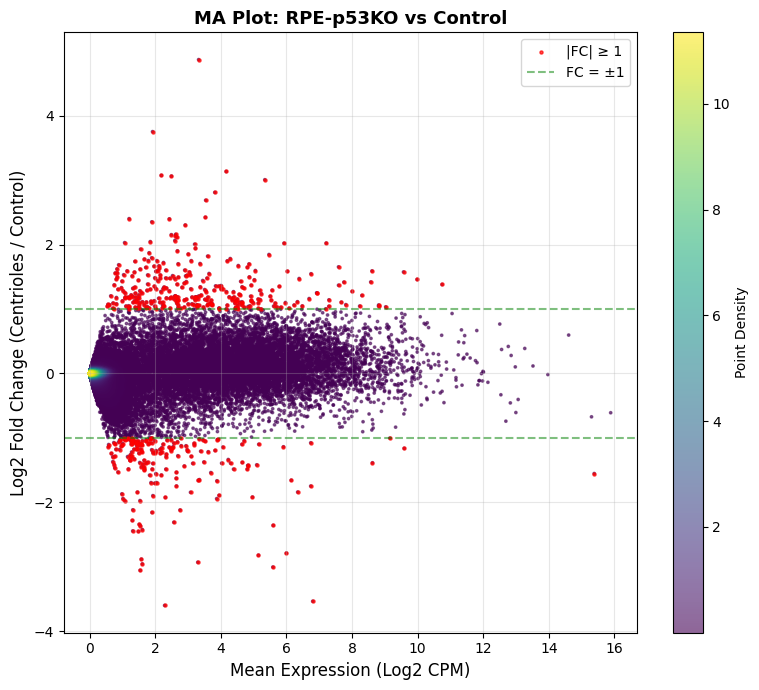

In [45]:

fig, ax1 = plt.subplots(1, 1, figsize=(8, 7))

# === MA Plot with Density ===
idx = z.argsort()
x, y, z_sorted = mean_expr.iloc[idx], fold_change.iloc[idx], z[idx]

scatter = ax1.scatter(x, y, c=z_sorted, s=3, cmap='viridis', alpha=0.6)
# highlight the significant points
significant = fold_change.abs() >= 1
ax1.scatter(mean_expr[significant], fold_change[significant], 
            color='red', s=5, alpha=0.7, label='|FC| ≥ 1')
plt.colorbar(scatter, ax=ax1, label='Point Density')

ax1.axhline(1, color='green', linestyle='--', linewidth=1.5, alpha=0.5, label='FC = ±1')
ax1.axhline(-1, color='green', linestyle='--', linewidth=1.5, alpha=0.5)

ax1.set_xlabel('Mean Expression (Log2 CPM)', fontsize=12)
ax1.set_ylabel('Log2 Fold Change (Centrioles / Control)', fontsize=12)
ax1.set_title('MA Plot: RPE-p53KO vs Control', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Filter the cell line specific genes

- minimize the distance between KE37 and HeLa, and RPE p53(-)
- remove the specifically enriched genes in KE37 and HeLa

In [57]:
# For the three cell lines, identify cellline-specific genes
RPE_samples = sample_info[sample_info['cell_line']=='RPE-p53KO'].index
HeLa_samples = sample_info[sample_info['cell_line']=='HeLa'].index
# use CPM values
RPE_counts = log_cpm[RPE_samples]
HeLa_counts = log_cpm[HeLa_samples]

# calculate mean expression and fold change
mean_RPE = RPE_counts.mean(axis=1)
mean_HeLa = HeLa_counts.mean(axis=1)
fold_change = mean_RPE - mean_HeLa

#### Removed the all genes only expressed in KE37 and HeLa but not in RPE1, 26878 in total
- Here we only use KE37 and HeLa to amplify the 

In [ ]:
# Select centriole-specific genes
threshold = 0
HeLa_specific = (mean_RPE <= threshold) & (mean_HeLa > 0)  # output the genes only exxpressed in HeLa
HeLa_genes = HeLa_specific[HeLa_specific].index
print(f'Number of HeLa-specific genes: {len(HeLa_genes)}')

Number of centriole-specific genes: 23854


In [59]:
# For the three cell lines, identify cellline-specific genes
# RPE_samples = sample_info[sample_info['cell_line']=='RPE-p53KO'].index
ke37_samples = sample_info[sample_info['cell_line']=='KE37-WT'].index
# use CPM values
RPE_counts = log_cpm[RPE_samples]
ke37_counts = log_cpm[ke37_samples]

# calculate mean expression and fold change
mean_RPE = RPE_counts.mean(axis=1)
mean_ke37 = ke37_counts.mean(axis=1)
fold_change = mean_RPE - mean_ke37
# Select centriole-specific genes
threshold = 0
ke37_specific = (mean_RPE <= threshold) & (mean_ke37 > 0)  # output the genes only exxpressed in HeLa
ke37_genes = ke37_specific[ke37_specific].index
print(f'Number of KE37-specific genes: {len(ke37_genes)}')

Number of KE37-specific genes: 17258


In [62]:
# combine KE37 specific genes and HeLa specific genes into a single list
cellline_specific_genes = pd.Index.union(HeLa_genes, ke37_genes)
print(f'Total number of cellline-specific genes: {len(cellline_specific_genes)}')

Total number of cellline-specific genes: 26878


## Extract centriole-specific genes + Visualization/

In [63]:
centriole_samples = sample_info[sample_info['condition']=='with_centrioles'].index
control_samples = sample_info[sample_info['condition']=='without_centrioles'].index
# use CPM values
centriole_counts = log_cpm[centriole_samples]
control_counts = log_cpm[control_samples]

# calculate mean expression and fold change
mean_centrioles = centriole_counts.mean(axis=1)
control_expr = control_counts.mean(axis=1)
fold_change = mean_centrioles - control_expr

In [64]:
# Select centriole-specific genes
threshold = 0
centriole_specific = (control_expr <= threshold) & (mean_centrioles > 0)  # Must be expressed in centrioles
centriole_genes = centriole_specific[centriole_specific].index
print(f'Number of centriole-specific genes: {len(centriole_genes)}')

Number of centriole-specific genes: 26762


In [65]:
# remove cellline-specific genes from centriole-specific genes
final_genes = centriole_genes.difference(cellline_specific_genes)
print(f'Number of centriole-specific genes after removing cellline-specific genes: {len(final_genes)}')

Number of centriole-specific genes after removing cellline-specific genes: 6775


In [56]:
gene_list = pd.DataFrame({
    'gene_id': centriole_genes,
    'control_expr': control_expr[centriole_genes].values,
    'centrioles_mean': mean_centrioles[centriole_genes].values,
    'fold_change': fold_change[centriole_genes].values
}).sort_values('centrioles_mean', ascending=False)

gene_list.to_csv('centriole_specific_genes.csv', index=False)
print(f"\nTop 10 centriole-specific genes:")
print(gene_list)


Top 10 centriole-specific genes:
                 gene_id  control_expr  centrioles_mean  fold_change
3183  ENSG00000205189.13           0.0         2.400944     2.400944
187   ENSG00000169174.13           0.0         1.556694     1.556694
5181  ENSG00000007038.11           0.0         0.645964     0.645964
1889  ENSG00000168491.10           0.0         0.477915     0.477915
828   ENSG00000152292.18           0.0         0.468362     0.468362
...                  ...           ...              ...          ...
796    ENSG00000223859.2           0.0         0.004569     0.004569
6189   ENSG00000302265.1           0.0         0.004569     0.004569
6200   ENSG00000276031.1           0.0         0.004569     0.004569
6210   ENSG00000214541.3           0.0         0.004569     0.004569
6140   ENSG00000241054.2           0.0         0.004569     0.004569

[6775 rows x 4 columns]


In [66]:
# plot a PCA plot after removing cellline-specific genes, only using final_genes
final_counts = log_cpm.loc[final_genes]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(final_counts.T)  # transpose to have samples as rows
# Create PCA fataframe
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2'], 
    index=final_counts.columns)
pca_df = pca_df.join(sample_info)

In [68]:
final_counts

,control,rep3_1,rep2_1,rep1_1,rep1_0,rep3_0,rep2_0
Geneid,,,,,,,
ENSG00000000938.13,0.0,4.513364,0.000000,0.258046,0.327899,5.386428,0.156234
ENSG00000003989.18,0.0,0.162940,0.119187,6.217308,6.239965,0.000000,0.556017
ENSG00000004809.14,0.0,0.151893,0.060824,0.126720,0.140220,0.353603,0.088876
ENSG00000004948.16,0.0,0.268999,0.000000,0.174447,0.642844,0.000000,0.156234
ENSG00000005102.14,0.0,0.184785,0.020561,5.573693,4.903488,0.286023,0.204765
...,...,...,...,...,...,...,...
ENSG00000310476.1,0.0,0.106836,0.000000,0.052031,0.000000,0.233176,0.018219
ENSG00000310478.1,0.0,0.024435,0.000000,0.017553,0.268012,0.000000,0.036210
ENSG00000310483.1,0.0,0.000000,0.010317,0.000000,0.000000,0.000000,0.000000


In [70]:
pca_df

,PC1,PC2,cell_line,condition,replicate
control,-14.825022,-18.420052,RPE-SAS6KO,without_centrioles,1
rep3_1,30.875144,-0.843880,KE37-WT,with_centrioles,2
rep2_1,-14.304363,-17.126628,RPE-p53KO,with_centrioles,2
rep1_1,-18.984242,23.080353,HeLa,with_centrioles,2
rep1_0,-17.246481,25.872280,HeLa,with_centrioles,1
rep3_0,48.794718,3.369023,KE37-WT,with_centrioles,1
rep2_0,-14.309753,-15.931096,RPE-p53KO,with_centrioles,1


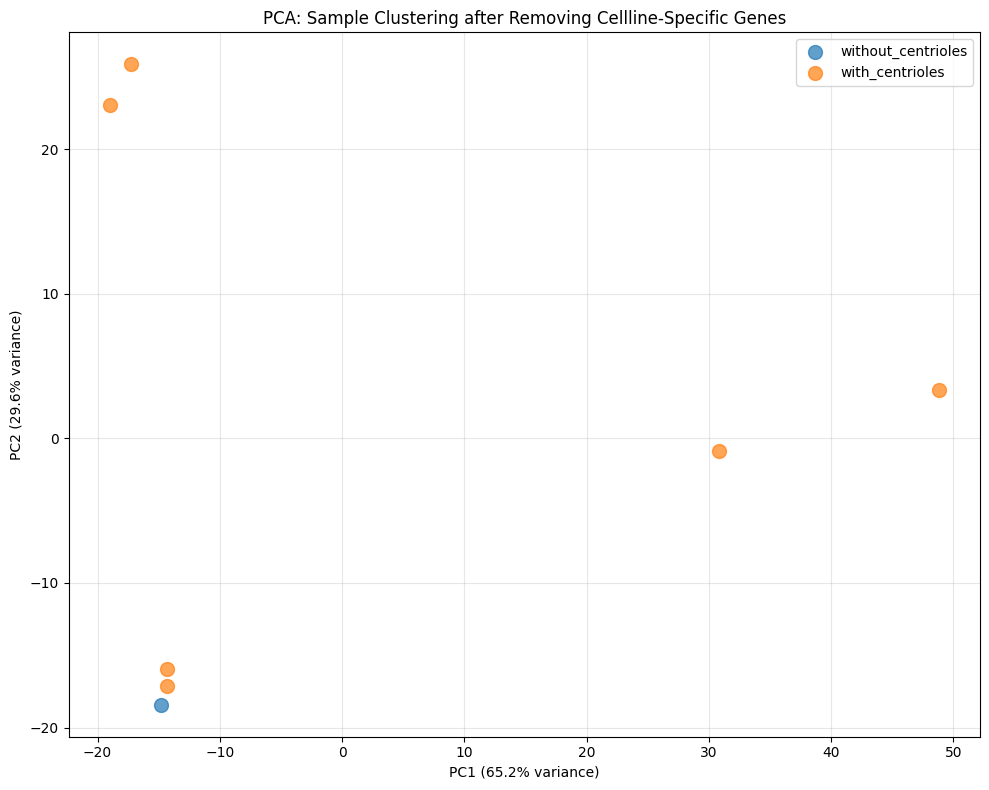

In [71]:
plt.figure(figsize=(10, 8))
for condition in pca_df['condition'].unique():
    mask = pca_df['condition'] == condition
    plt.scatter(pca_df.loc[mask, 'PC1'], 
                pca_df.loc[mask, 'PC2'],
                label=condition, s=100, alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA: Sample Clustering after Removing Cellline-Specific Genes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()